In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization

# ~ Data preprocessing section ~
# Save the training data from fashion-mnist_test.csv to the "train" DataFrame
train = pd.read_csv("drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv")
# Save the testing data from fashion-mnist_test.csv to the "test" DataFrame
test = pd.read_csv("drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv")
# From the training DataFrame, get the values of each label
Y_train = train['label'].values
# From the training DataFrame, drop the 'label' attribute
X_train = train.drop(labels = ['label'], axis = 1)
# From the testing DataFrame, get the values of each label
Y_test = test['label'].values
# From the testing DataFrame, drop the 'label' attribute
X_test = test.drop(labels = ['label'], axis = 1)
# Normalisation of our Dataframes (scale 0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0
# Change of the shape of our DataFrames 
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
# Convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)
# Convert to one-hot-encoding
Y_test = to_categorical(Y_test, num_classes = 10)

# Define our 1st Convolutional Neural Network, with 1 Convolutional Layer
# For more information about the CNN structure, check out our final report
name1 = '1_NN'
cnn_model_1 = Sequential([], name = name1)
# 1st Convolutional Layer
cnn_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(128, activation='relu'))
# Note; the last layer has a softmax activation function with 10 outputs (1 for each label)
cnn_model_1.add(Dense(10, activation='softmax'))

# Define our 2nd Convolutional Neural Network, with 2 Convolutional Layers
name2 = '2_NN'
cnn_model_2 = Sequential([], name = name2)
# 1st Convolutional Layer
cnn_model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_2.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(128, activation='relu'))
# Note; the last layer has a softmax activation function
cnn_model_2.add(Dense(10, activation='softmax'))

# Define our 3rd Convolutional Neural Network, with 3 Convolutional Layers
name3 = '3_NN'
cnn_model_3 = Sequential([], name = name3)
# 1st Convolutional Layer
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(BatchNormalization())
# 3rd Convolutional Layer
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(Dense(128, activation='relu'))
cnn_model_3.add(Flatten())
cnn_model_3.add(Dense(128, activation='relu'))
# Note; the last layer has a softmax activation function
cnn_model_3.add(Dense(10, activation='softmax'))

name4 = '4_NN'
cnn_model_4 = Sequential([],name = name4)
# 1st Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_4.add(BatchNormalization())
# 3rd Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(Dense(128, activation='relu'))
# 4th Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(128, activation='relu'))
# Note; the last layer has a softmax activation function
cnn_model_4.add(Dense(10, activation='softmax'))

In [ ]:
cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3, cnn_model_4]

for model in cnn_models:
    # Get the summary for each diffrent CNN (Layer Type, Output Shape and parameters)
    model.summary()

Model: "1_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 13, 13, 128)       512       
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 2,772,106
Trainable params: 2,771,850
Non-trainable params: 256
__________________________________________________

In [ ]:
# Create a new dictionary
history_dict = {}
# Define our optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Define our datagenerator object
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
# Generate data with the parameters given above, of our training DataFrame
datagen.fit(X_train)
# Initialize split method
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
# Compile our models and save the training information to the 'history_dict' dictionary
for model in cnn_models:
    model.compile(
    loss = 'categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    
    history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                              shuffle=True, epochs=50, 
                              validation_data = (X_val, Y_val),verbose = 1, 
                              steps_per_epoch=X_train.shape[0] // 128)
    history_dict[model.name] = history

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
421/421 [==============================] - 21s 33ms/step - loss: 0.7593 - accuracy: 0.7427 - val_loss: 0.7692 - val_accuracy: 0.7890
Epoch 2/50
421/421 [==============================] - 13s 31ms/step - loss: 0.4117 - accuracy: 0.8468 - val_loss: 0.3186 - val_accuracy: 0.8845
Epoch 3/50
421/421 [==============================] - 13s 31ms/step - loss: 0.3699 - accuracy: 0.8620 - val_loss: 0.3155 - val_accuracy: 0.8888
Epoch 4/50
421/421 [==============================] - 13s 31ms/step - loss: 0.3479 - accuracy: 0.8693 - val_loss: 0.3188 - val_accuracy: 0.8820
Epoch 5/50
421/421 [==============================] - 13s 31ms/step - loss: 0.3374 - accuracy: 0.8742 - val_loss: 0.3542 - val_accuracy: 0.8647
Epoch 6/50
421/421 [==============================] - 13s 31ms/step - loss: 0.3297 - accuracy: 0.8753 - val_loss: 0.3030 - val_accuracy: 0.8905
Epoch 7/50
421/421 [==============================] - 13s 31ms/step - loss: 0.3230 - accuracy: 0.8776 - val_loss: 0.3348 - val_accuracy:

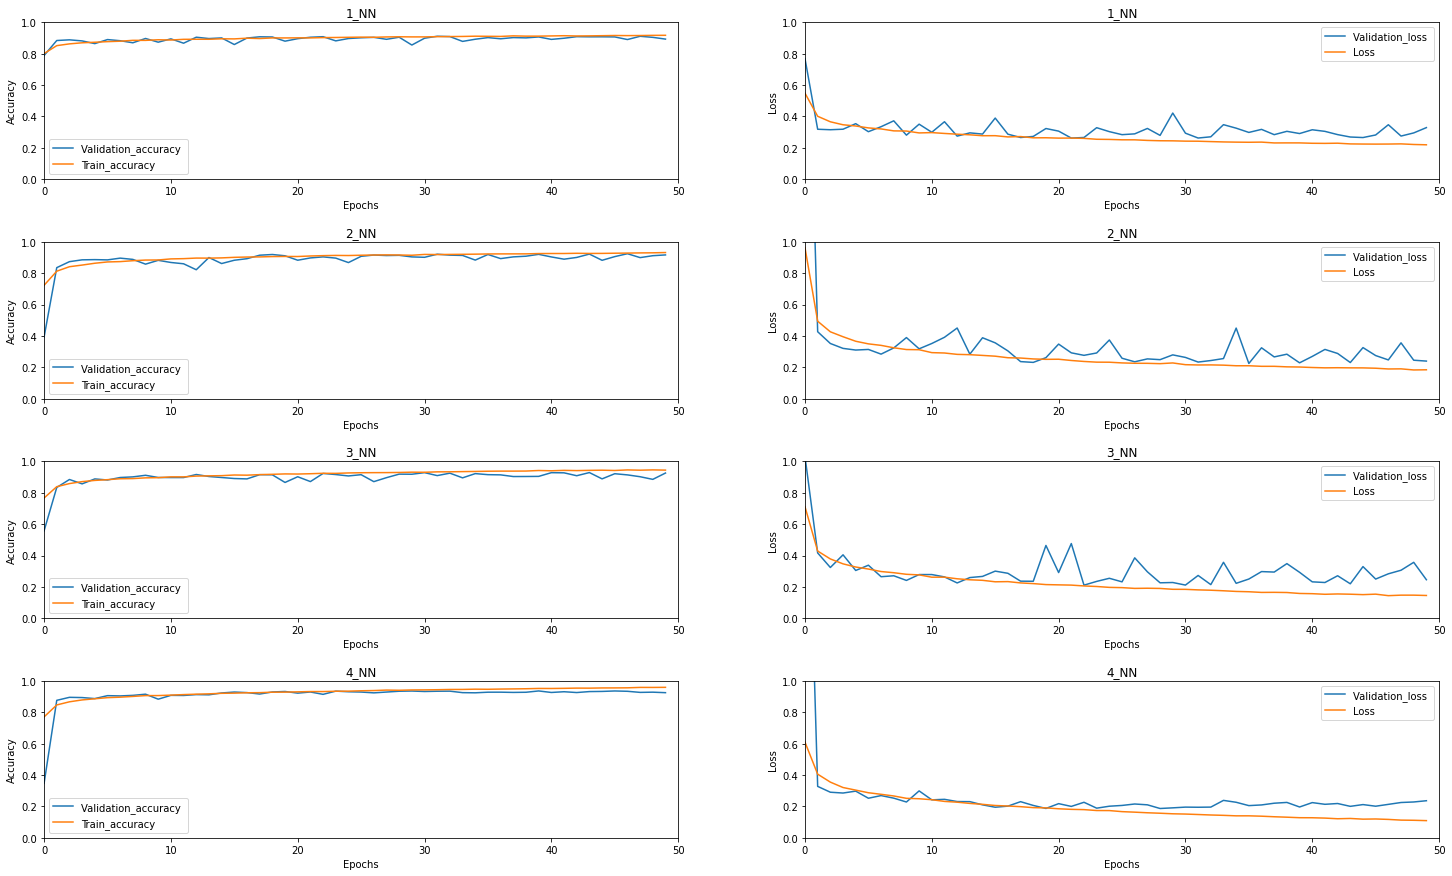

313/313 [==============================] - 1s 3ms/step - loss: 0.2879 - accuracy: 0.9016
Test loss: 0.2878681719303131
Test accuracy: 0.9016000032424927
313/313 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9202
Test loss: 0.23405146598815918
Test accuracy: 0.920199990272522
313/313 [==============================] - 1s 4ms/step - loss: 0.2291 - accuracy: 0.9297
Test loss: 0.22909940779209137
Test accuracy: 0.9297000169754028
313/313 [==============================] - 1s 4ms/step - loss: 0.2201 - accuracy: 0.9297
Test loss: 0.22009728848934174
Test accuracy: 0.9297000169754028


In [ ]:
# ~ Plotting Section ~ 
plt.figure(1,figsize=(25,15))
# Initialize our counter
count = 1
# For every object in the 'history_dict' dictionary, plot 2 graphs in a subplot.
for history in history_dict:
    train_acc = history_dict[history].history['accuracy']
    val_acc = history_dict[history].history['val_accuracy']
    loss = history_dict[history].history['loss']
    val_loss = history_dict[history].history['val_loss']
# 1st Plot; Validation Accuracy and Training accuracy for each epoch of the training process 
    plt.subplot(4,2,count)
    plt.plot(val_acc, label= "Validation_accuracy ")
    plt.plot(train_acc, label = "Train_accuracy ") 
    plt.title(""+history)
    plt.xlabel("Epochs")
    # Limit y axis from 0 to 1
    plt.ylim(0,1)
    # Limit x axis from 0 to 50
    plt.xlim(0,50)
    plt.ylabel("Accuracy")
    plt.legend()
# 2nd Plot; Validation Loss and Training Loss for each epoch of the training process 
    plt.subplot(4,2,count+1)
    plt.subplots_adjust(hspace=0.4)
    plt.plot(val_loss, label="Validation_loss ")
    plt.plot(loss, label = "Loss ")
    plt.title(""+history)
    plt.xlabel("Epochs")
    # Limit y axis from 0 to 1
    plt.ylim(0,1)
    # Limit x axis from 0 to 50
    plt.xlim(0,50)
    plt.ylabel("Loss")
    plt.legend()
    count = count + 2
plt.show()

# ~ Evaluation Section ~
# Get the evaluation of each model by using our testing DataFrame.
for model in cnn_models:
    score_model = model.evaluate(X_test, Y_test)
    print('Test loss:', score_model[0])
    print('Test accuracy:', score_model[1])